### Importing Important Libraries

In [48]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder,LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_auc_score

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

### Importing Data

In [2]:
train_features = pd.read_csv('training_set_features.csv')
train_labels = pd.read_csv('training_set_labels.csv')
test_features = pd.read_csv('test_set_features.csv')

### Understanding Data

In [7]:
train_features.head()

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [8]:
train_labels.head()

,respondent_id,xyz_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0


In [13]:
train_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   xyz_concern                  26615 non-null  float64
 2   xyz_knowledge                26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_xyz              24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [31]:
train_data = pd.merge(train_features, train_labels, on='respondent_id')

In [32]:
train_data.head()

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,xyz_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


In [34]:
X = train_data.drop(columns=['respondent_id', 'xyz_vaccine', 'seasonal_vaccine'])
y = train_data[['xyz_vaccine', 'seasonal_vaccine']]

### Data Visualisation

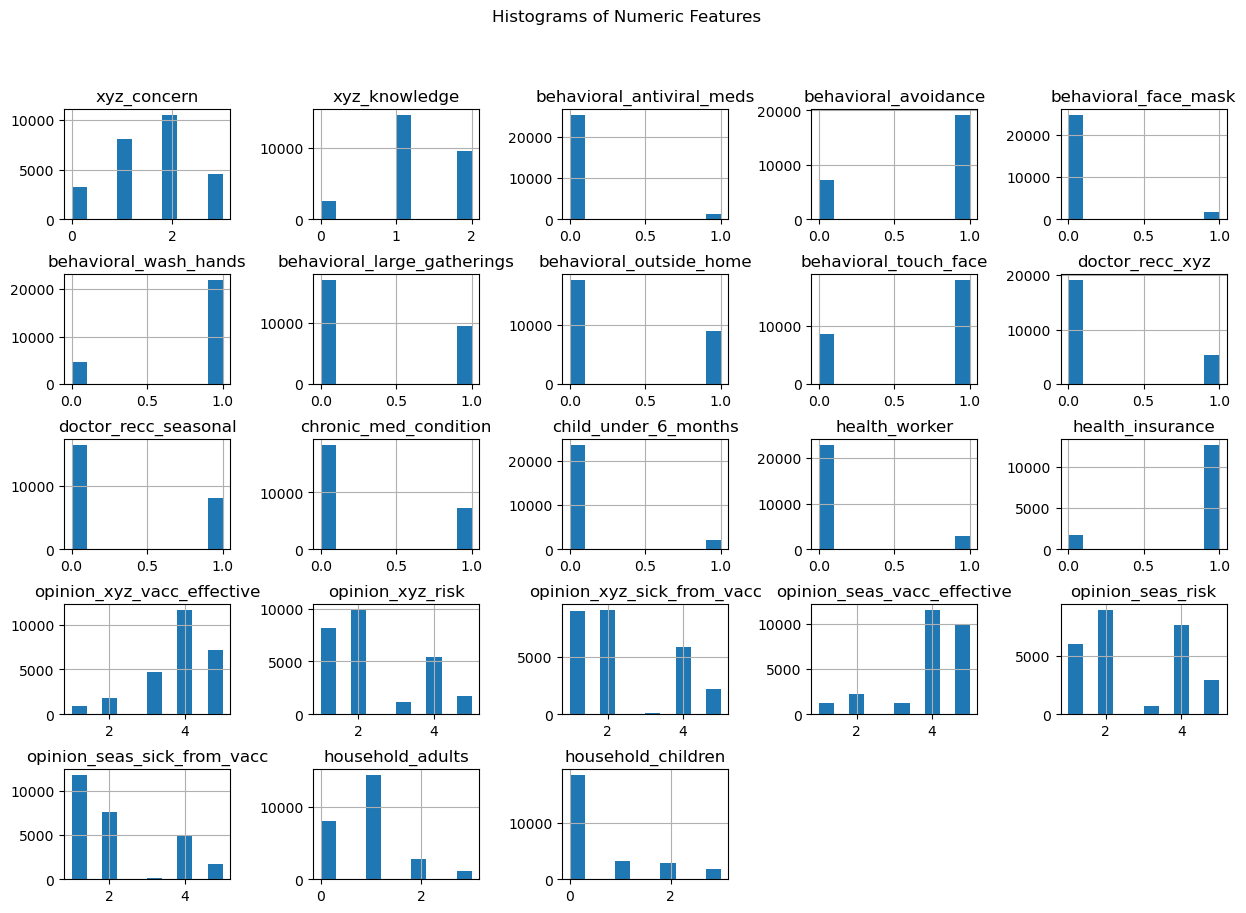

In [39]:
numeric_features = X.select_dtypes(include=['float64']).columns
X[numeric_features].hist(figsize=(15, 10))
plt.suptitle('Histograms of Numeric Features')
plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()

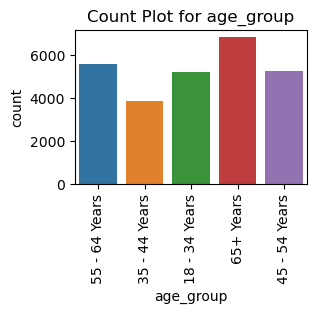

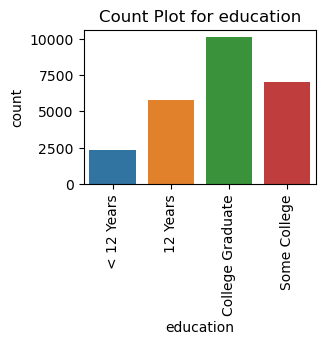

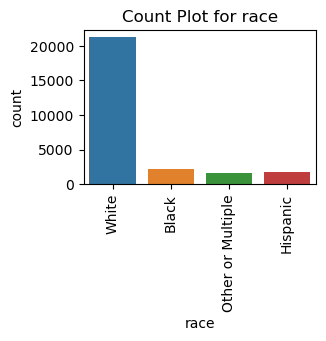

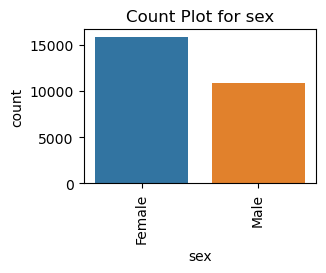

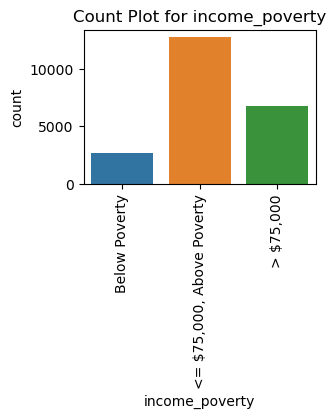

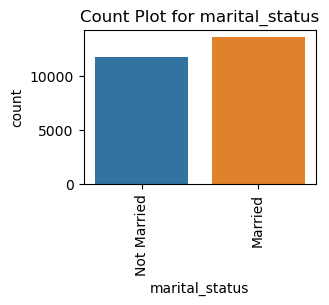

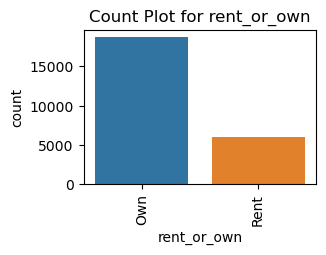

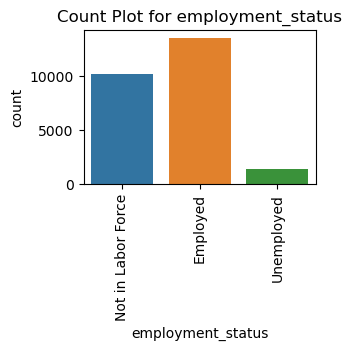

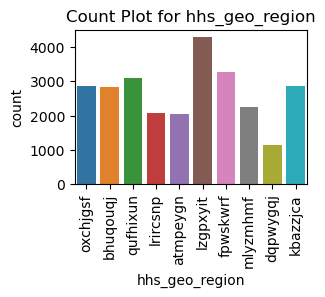

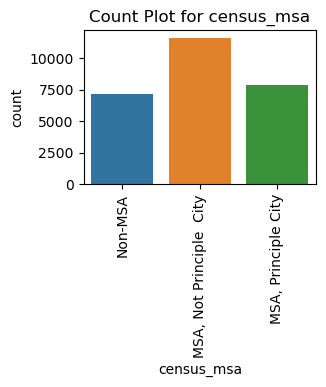

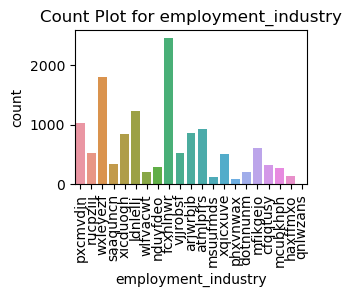

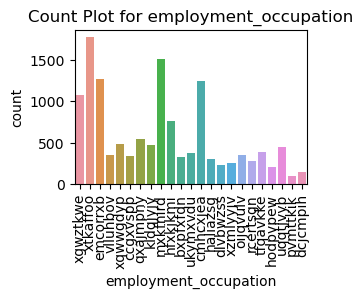

In [45]:
categorical_features = X.select_dtypes(include=['object']).columns
for col in categorical_features:
    plt.figure(figsize=(3, 2))
    sns.countplot(x=col, data=X)
    plt.title(f'Count Plot for {col}')
    plt.xticks(rotation=90)
    plt.show()

In [49]:
label_encoders = {}
for col in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

### Understanding the Correlation between the Features

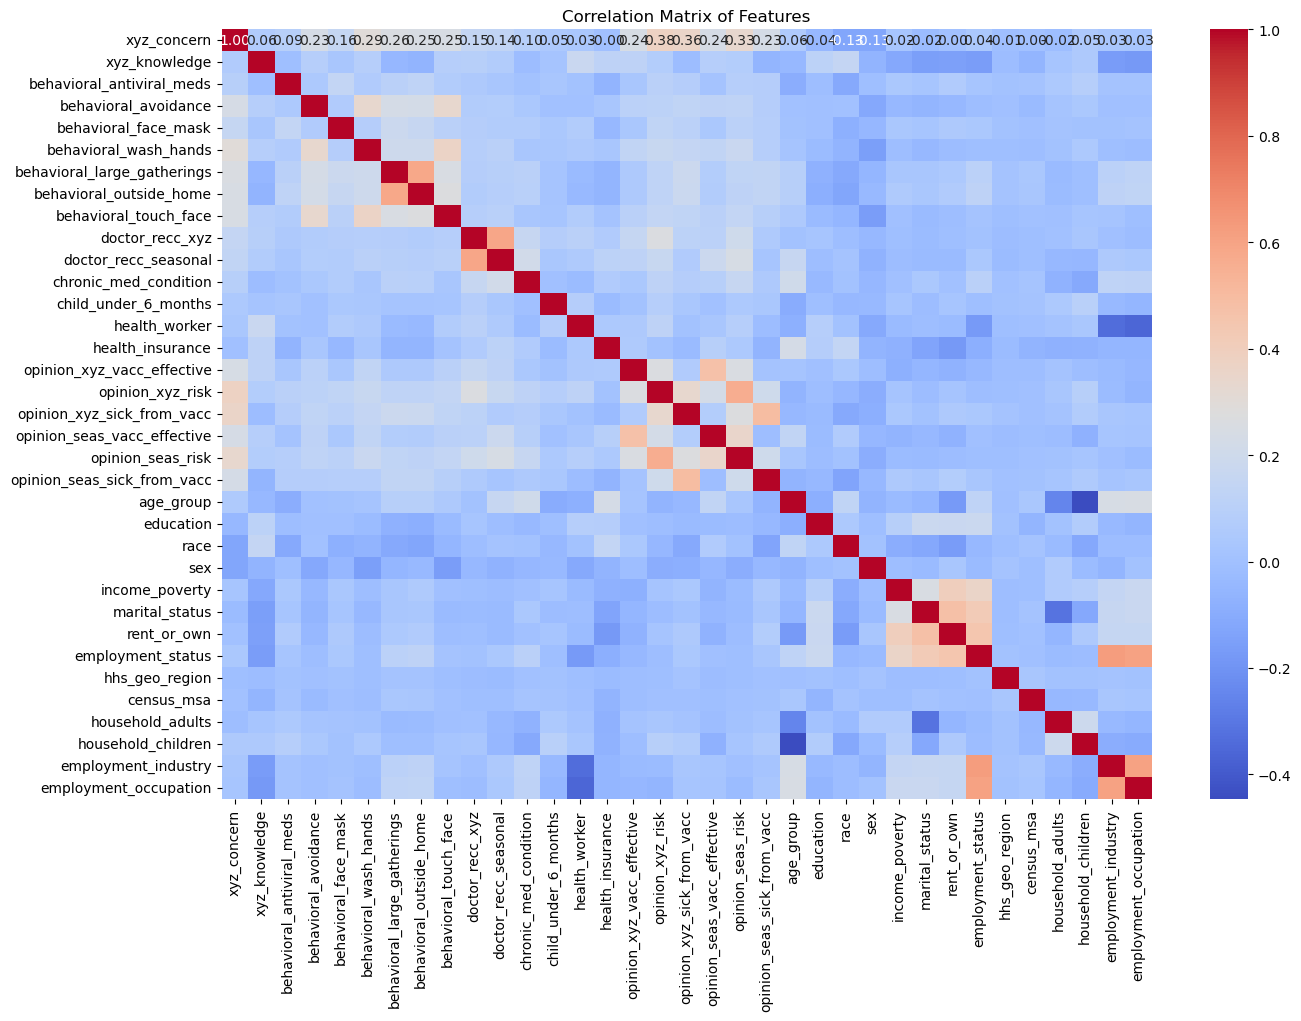

In [53]:
correlation_matrix = X.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()

### Feature Extraction

In [78]:
threshold = 0.01
low_correlation_features = [col for col in correlation_matrix.columns if any(abs(correlation_matrix[col]) < threshold)]
print(f'Features with low correlation (below {threshold} threshold): {low_correlation_features}')

Features with low correlation (below 0.01 threshold): ['xyz_concern', 'behavioral_antiviral_meds', 'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands', 'behavioral_large_gatherings', 'behavioral_outside_home', 'behavioral_touch_face', 'doctor_recc_xyz', 'chronic_med_condition', 'child_under_6_months', 'health_worker', 'health_insurance', 'opinion_xyz_vacc_effective', 'opinion_xyz_risk', 'opinion_xyz_sick_from_vacc', 'opinion_seas_vacc_effective', 'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group', 'education', 'race', 'sex', 'income_poverty', 'marital_status', 'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa', 'household_adults', 'household_children', 'employment_industry', 'employment_occupation']


In [98]:
X = X[low_correlation_features]
test_features = test_features[low_correlation_features]

In [79]:
len(X.columns)

33

In [81]:
categorical_cols = X.columns[X.dtypes == 'float64']
X[categorical_cols] = X[categorical_cols].fillna(0).replace([np.inf, -np.inf], np.nan).astype(int)
test_features[categorical_cols] = test_features[categorical_cols].fillna(0).replace([np.inf, -np.inf], np.nan).astype(int)

### Model Training

In [88]:
model = MultiOutputRegressor(RandomForestRegressor(n_estimators=100, random_state=42))

In [89]:
clf = Pipeline(steps=[
    ('model', model)
])


In [90]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

In [92]:
clf.fit(X_train, y_train)

Pipeline(steps=[('model',
                 MultiOutputRegressor(estimator=RandomForestRegressor(random_state=42)))])

In [93]:
y_pred = clf.predict(X_valid)

### Checking Accuracies

In [94]:
roc_auc_xyz = roc_auc_score(y_valid['xyz_vaccine'], y_pred[:, 0])
roc_auc_seasonal = roc_auc_score(y_valid['seasonal_vaccine'], y_pred[:, 1])
mean_roc_auc = (roc_auc_xyz + roc_auc_seasonal) / 2

print(f'ROC AUC for xyz_vaccine: {roc_auc_xyz}')
print(f'ROC AUC for seasonal_vaccine: {roc_auc_seasonal}')
print(f'Mean ROC AUC: {mean_roc_auc}')

ROC AUC for xyz_vaccine: 0.8512779542646799
ROC AUC for seasonal_vaccine: 0.8306234926806854
Mean ROC AUC: 0.8409507234726826


### Preparing Test Data

In [97]:
test_features.columns

Index(['xyz_concern', 'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_xyz', 'chronic_med_condition',
       'child_under_6_months', 'health_worker', 'health_insurance',
       'opinion_xyz_vacc_effective', 'opinion_xyz_risk',
       'opinion_xyz_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation'],
      dtype='object')

In [100]:
test_features.head()

,xyz_concern,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_xyz,chronic_med_condition,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,2,0,1,0,1,1,0,1,0,0,...,"> $75,000",Not Married,Rent,Employed,mlyzmhmf,"MSA, Not Principle City",1,0,atmlpfrs,hfxkjkmi
1,1,0,0,0,0,0,0,0,0,0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,Non-MSA,3,0,atmlpfrs,xqwwgdyp
2,2,0,0,1,1,1,1,1,0,0,...,"> $75,000",Married,Own,Employed,lrircsnp,Non-MSA,1,0,nduyfdeo,pvmttkik
3,1,0,0,0,0,0,0,0,1,1,...,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,lrircsnp,"MSA, Not Principle City",1,0,NaN,NaN
4,3,1,1,0,1,1,1,1,0,0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,Non-MSA,0,1,fcxhlnwr,mxkfnird


In [101]:
label_encoders = {}
for col in test_features.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    test_features[col] = le.fit_transform(test_features[col])
    label_encoders[col] = le

### Prediction

In [105]:
test_pred = clf.predict(test_features)

In [107]:
test_csv = pd.read_csv('test_set_features.csv')

### Submission

In [109]:
submission = pd.DataFrame({
    'respondent_id': test_csv['respondent_id'],
    'xyz_vaccine': test_pred[:, 0],
    'seasonal_vaccine': test_pred[:, 1]
})

In [110]:
submission.head()

,respondent_id,xyz_vaccine,seasonal_vaccine
0,26707,0.17,0.15
1,26708,0.12,0.10
2,26709,0.33,0.85
3,26710,0.82,0.95
4,26711,0.46,0.56


In [111]:
submission.to_csv('submission.csv', index=False)